In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#@title uploader
file_id = "1VpSCc_ms2dj59bMAAOqCu0OI0jjb-8Hq" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html


from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!unzip {fileId['title']}

widsdatathon2025.zip
Archive:  widsdatathon2025.zip
  inflating: Data Dictionary.xlsx    
  inflating: SAMPLE_SUBMISSION.xlsx  
  inflating: TEST/TEST_CATEGORICAL.xlsx  
  inflating: TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TEST/TEST_QUANTITATIVE_METADATA.xlsx  
  inflating: TRAIN/TRAINING_SOLUTIONS.xlsx  
  inflating: TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx  
  inflating: TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx  


https://drive.google.com/file/d/1VpSCc_ms2dj59bMAAOqCu0OI0jjb-8Hq/view?usp=sharing

<h2> Data Exploration </h2>

Imported two datasets - train_quantitative and train_answers. Both datasets are loaded permanently into the folder in this colab (to see how to do it, check [this stackoverflow post](https://stackoverflow.com/questions/50426015/how-to-upload-data-permanently-on-google-colaboratory). Checked out their formats and plotted the distribution of the data.

In [ ]:
train_quantitative = pd.read_excel('TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

In [ ]:
train_answers = pd.read_excel('TRAIN/TRAINING_SOLUTIONS.xlsx')

In [ ]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


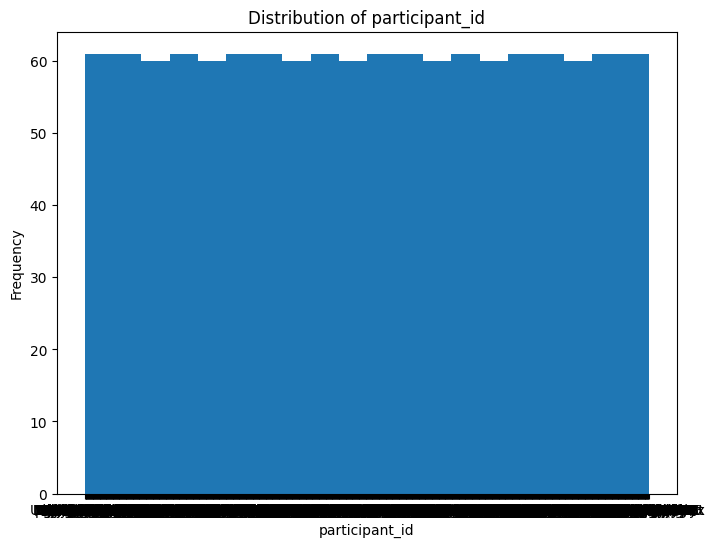

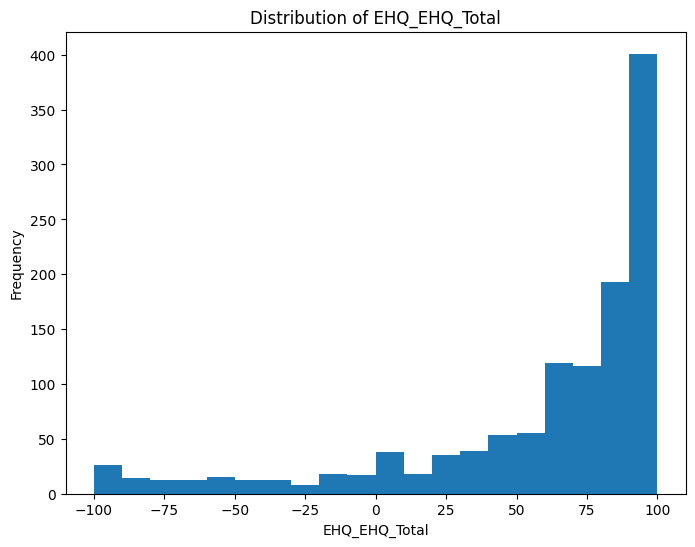

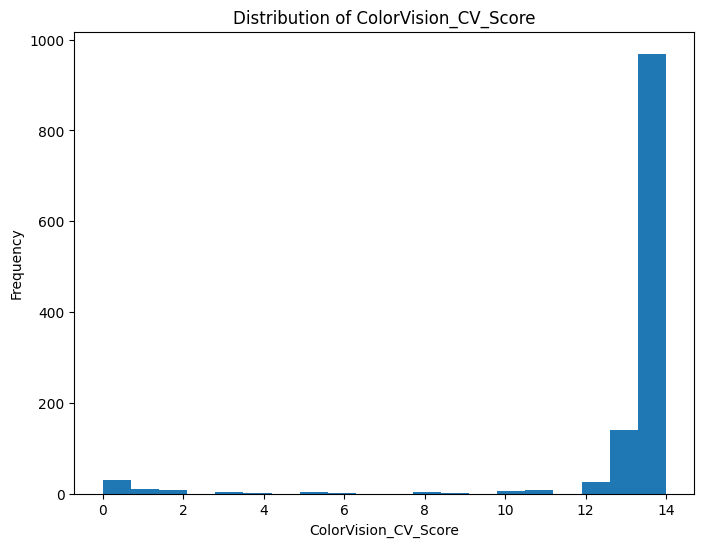

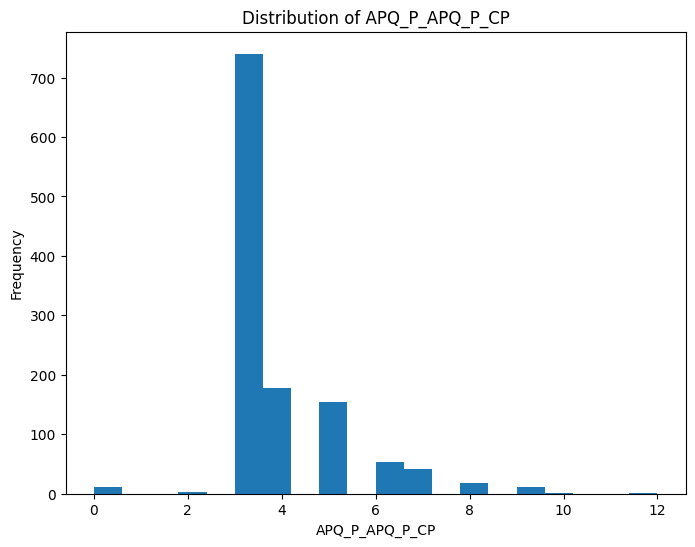

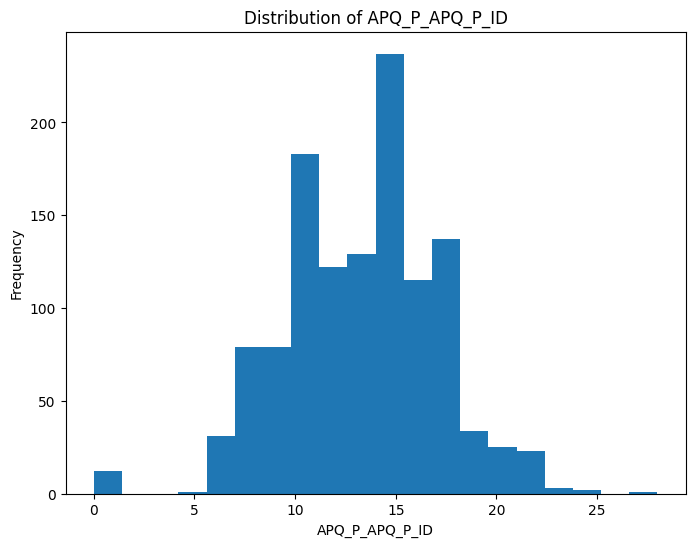

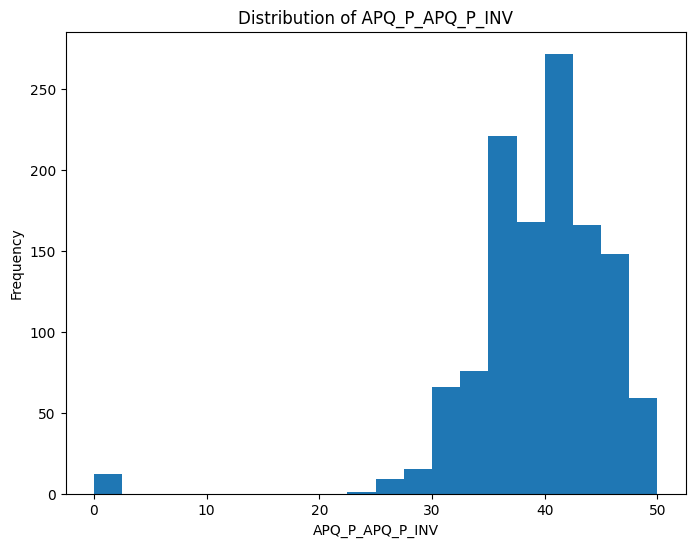

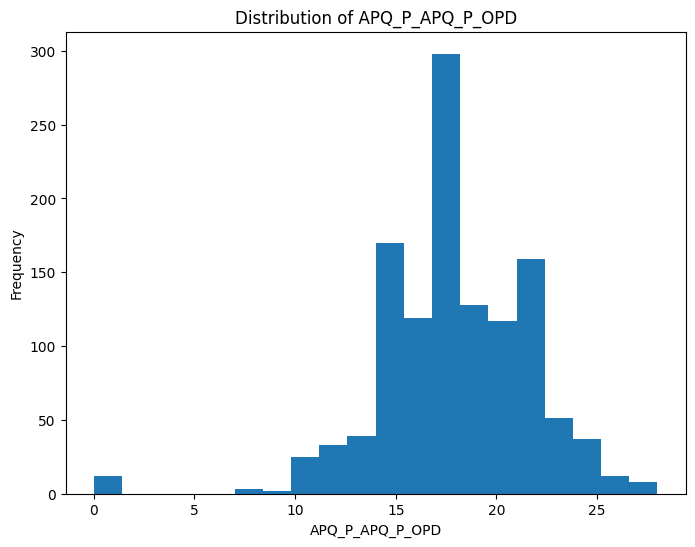

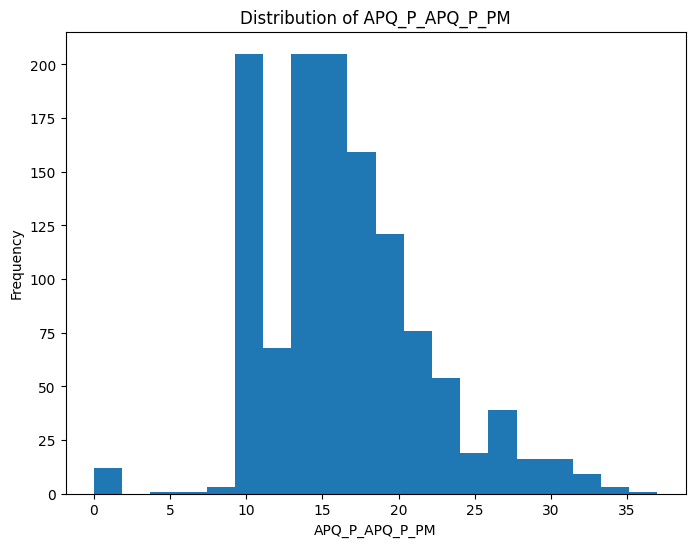

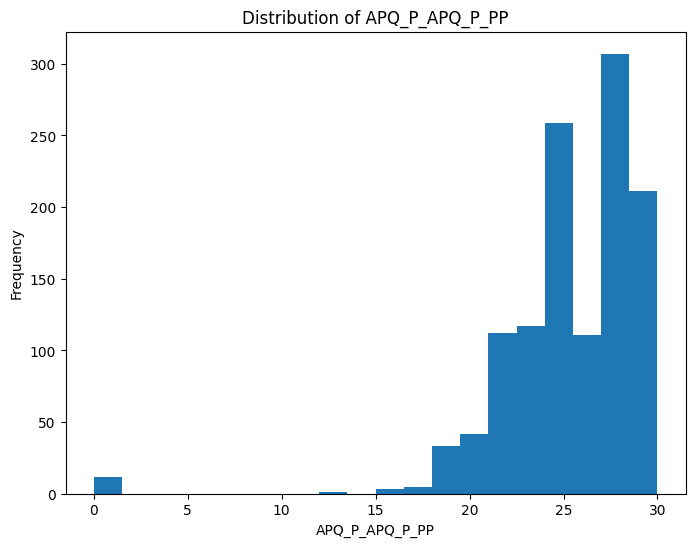

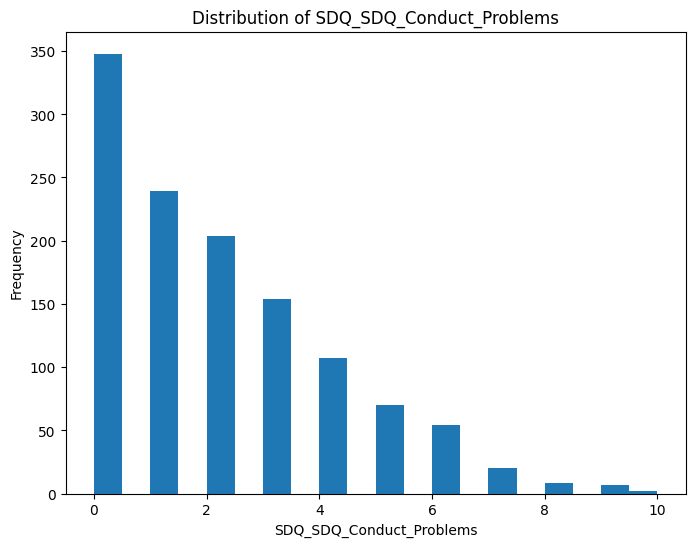

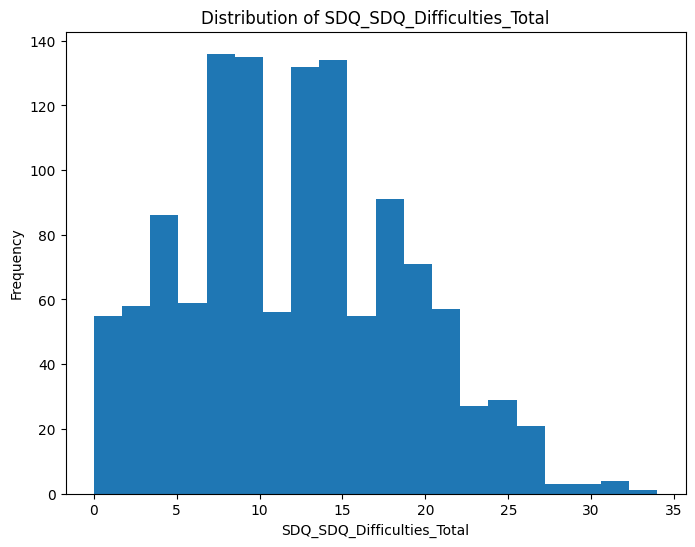

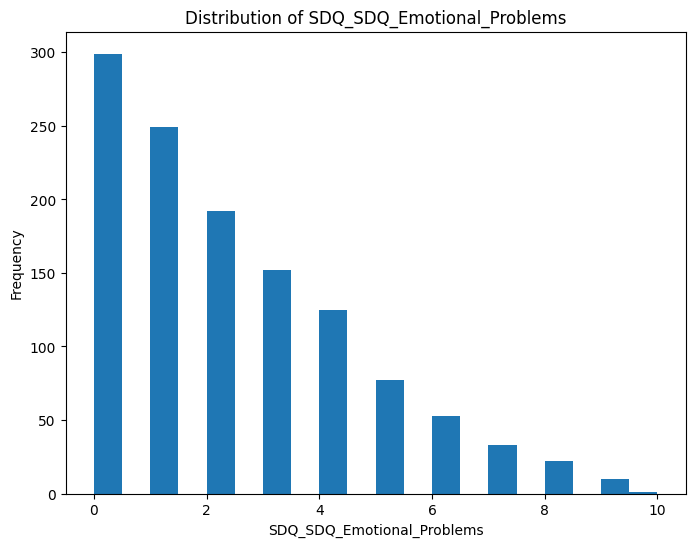

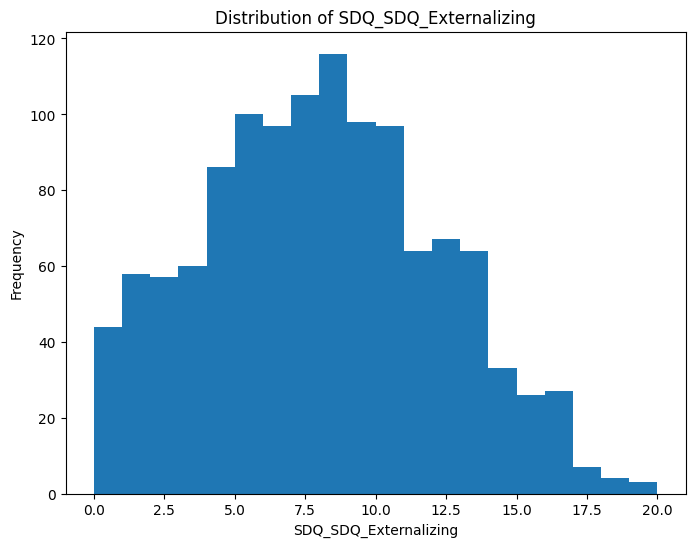

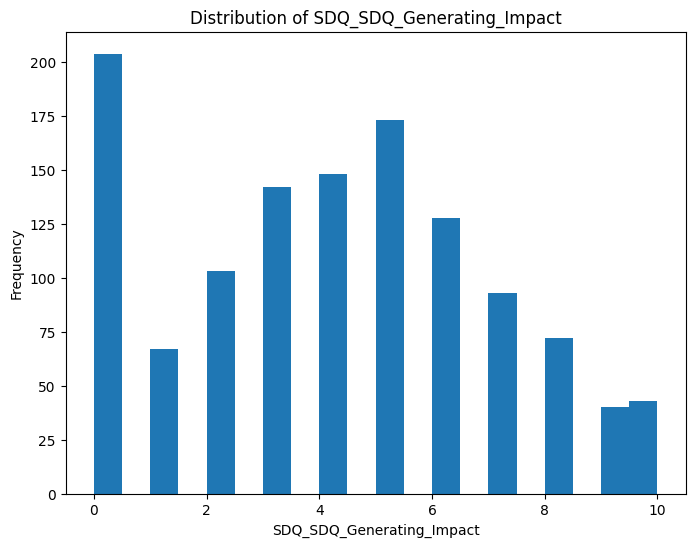

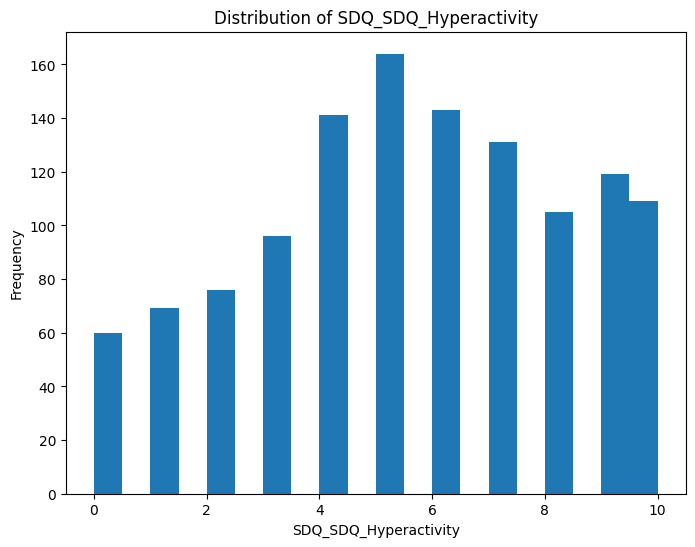

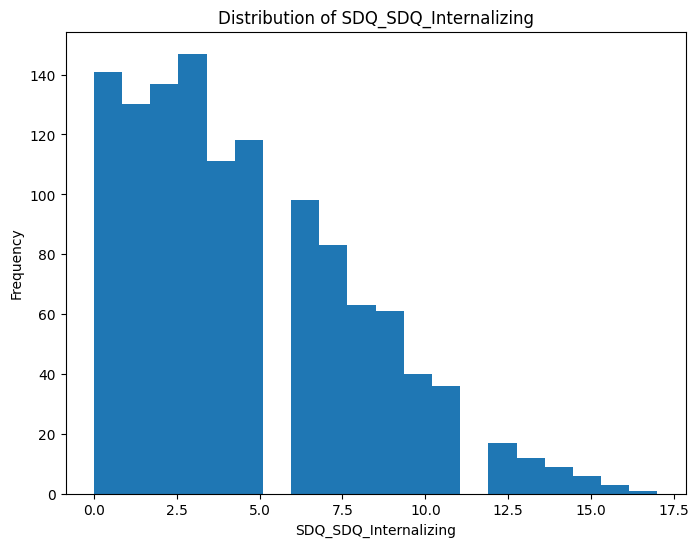

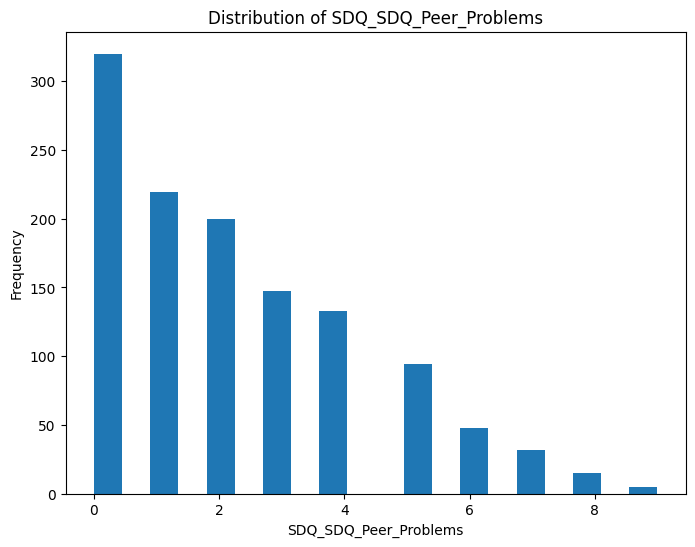

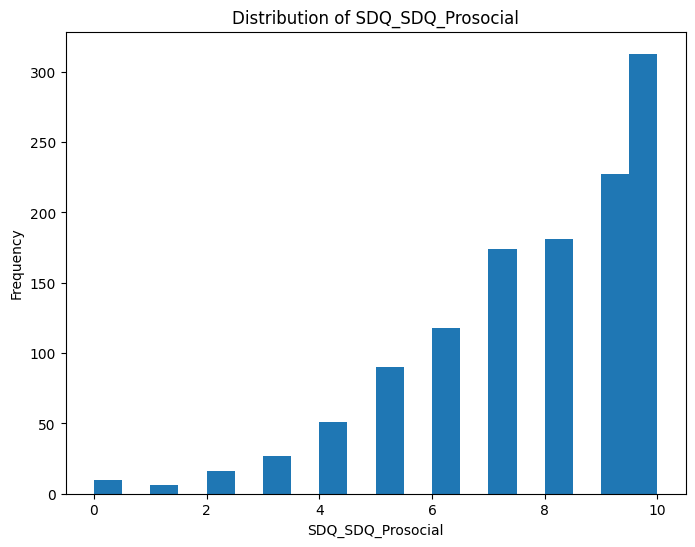

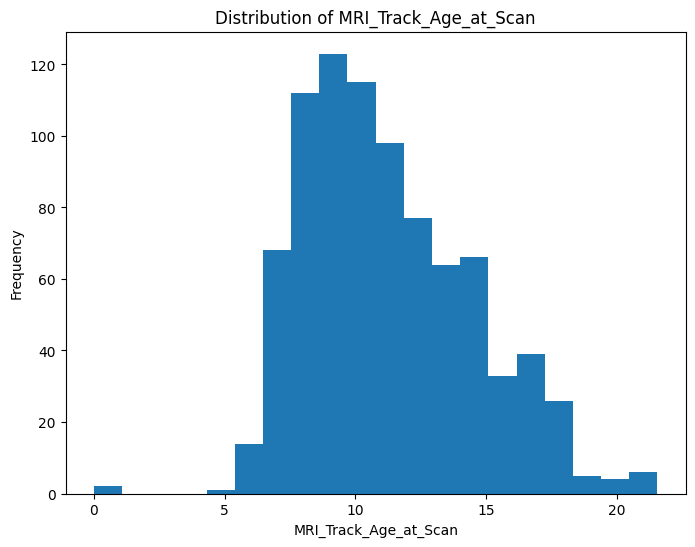

In [ ]:
import matplotlib.pyplot as plt

# Loop through each column in the dataframe
for column in train_quantitative.columns:
      plt.figure(figsize=(8, 6))
      plt.hist(train_quantitative[column], bins=20)
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.show()


In [ ]:
train_quantitative.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

<h3> Confirming no missing values </h3>

In [ ]:
train_quantitative.columns.isna().sum()

0

In [ ]:
train_answers.isna().sum()

,0
participant_id,0
ADHD_Outcome,0
Sex_F,0


In [ ]:
train_answers.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


<h1> Models! </h1>

<h2> Model Selection </h2>
Decision Trees, Gradient Boosted Classifiers, and Logistic Regressors all underfit on the data (as you can tell the train and test accuracies are both very low) for both Sex_F and ADHD_Outcome. Hyperparameters such as tree depth should be the next move.

**Sex_F Model Selection**

In [ ]:

# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')
# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['Sex_F']
# Import necessary libraries for model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # 5-fold cross-validation
    results[name] = {
        'mean_accuracy': np.mean(cv_scores),
        'std_accuracy': np.std(cv_scores)
    }

# Print the results
for name, result in results.items():
    print(f'{name}: Mean Accuracy = {result["mean_accuracy"]:.4f}, Std Dev = {result["std_accuracy"]:.4f}')

# Select the best-performing model based on mean accuracy
best_model_name = max(results, key=lambda k: results[k]['mean_accuracy'])
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'\nBest Model: {best_model_name}')
print(f'Test Accuracy: {accuracy:.4f}')



ValueError: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


**ADHD_Outcome Model Selection**

In [ ]:

# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')
# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # 5-fold cross-validation
    results[name] = {
        'mean_accuracy': np.mean(cv_scores),
        'std_accuracy': np.std(cv_scores)
    }

# Print the results
for name, result in results.items():
    print(f'{name}: Mean Accuracy = {result["mean_accuracy"]:.4f}, Std Dev = {result["std_accuracy"]:.4f}')

# Select the best-performing model based on mean accuracy
best_model_name = max(results, key=lambda k: results[k]['mean_accuracy'])
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'\nBest Model: {best_model_name}')
print(f'Test Accuracy: {accuracy:.4f}')

# Try making predictions on training set to evaluate under/overfit
y_pred_training = best_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_training)
print(f'Training Accuracy: {training_accuracy:.4f}')



ValueError: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


<h1> Experimentation </h1>

<h2> Decision Trees </h2>

**Sex_F Prediction**

In [ ]:
# Combine the quantitative data with the gender labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')


Decision Tree Accuracy: 0.6584
Decision Tree Training Accuracy: 0.6567


**ADHD_Outcome Prediction**

In [ ]:
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')


Decision Tree Accuracy: 0.6841
Decision Tree Training Accuracy: 0.6853


<h3> Gradient Boosted Decision Trees </h3>

**ADHD_Outcome Prediction**

In [ ]:
# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, gb_classifier.predict(X_train))
print(f'Gradient Boosting Training Accuracy: {train_accurac:.4f}')


Gradient Boosting Accuracy: 0.6841
Gradient Boosting Training Accuracy: 0.6853


**Grid Search - ADHD_Outcome**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['ADHD_Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)
print(f"Validation accuracy: {accuracy_score(y_train, y_pred)}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.8082474226804124


**Grid Search - Sex_F Prediction**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Combine the quantitative data with the ADHD_Outcome labels
train_data = pd.merge(train_quantitative, train_answers, on='participant_id')

# Separate features (X) and target variable (y)
X = train_data.drop(['participant_id', 'Sex_F', 'ADHD_Outcome', 'MRI_Track_Age_at_Scan'], axis=1)
y = train_data['Sex_F']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)
print(f"Validation accuracy: {accuracy_score(y_train, y_pred)}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Validation accuracy: 0.7494845360824742


<h3> To-dos: </h3>

- Increase complexity of our existing models by finetuning the hyperparameters
-  make a second gradient-boosted decision tree model for predicting **Sex_F**

## Params and Results

| Model         | Results       | Predicted   | Params    | Random State |
| ------------- | ------------- | ----------- | --------  | -------------|
| DT            | 0.6584        | Female      | 5-fold cv | 42
|               | 6853          | ADHD        | 5-fold cv | 42   
| GB DT         | 0.6567        | Female      | 5-fold cv | 42
|               | 0.808         | AHDH        | {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}|            |
|               | 0.749         | Female      | {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
|               | 6841          | ADHD        | 5-fold cv | 42
| Log Reg       | 0.6567        | Female      | 5-fold cv | 42
|               | 6853          | ADHD        | 5-fold cv | 42